# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



In [1]:
#Q1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/airbnb_hw.csv')
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [2]:
print(df.columns)
print(df.dtypes)
print(df.describe())

Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')
Host Id                         int64
Host Since                     object
Name                           object
Neighbourhood                  object
Property Type                  object
Review Scores Rating (bin)    float64
Room Type                      object
Zipcode                       float64
Beds                          float64
Number of Records               int64
Number Of Reviews               int64
Price                          object
Review Scores Rating          float64
dtype: object
            Host Id  Review Scores Rating (bin)       Zipcode          Beds  \
count  3.047800e+04                22155.000000  30344.000000  30393.000000   
mean   1.273171e+07                   90.738659  10584.854831      1.530089   

In [3]:
df['Price'].unique()

array(['145', '37', '28', '199', '549', '149', '250', '90', '270', '290',
       '170', '59', '49', '68', '285', '75', '100', '150', '700', '125',
       '175', '40', '89', '95', '99', '499', '120', '79', '110', '180',
       '143', '230', '350', '135', '85', '60', '70', '55', '44', '200',
       '165', '115', '74', '84', '129', '50', '185', '80', '190', '140',
       '45', '65', '225', '600', '109', '1,990', '73', '240', '72', '105',
       '155', '160', '42', '132', '117', '295', '280', '159', '107', '69',
       '239', '220', '399', '130', '375', '585', '275', '139', '260',
       '35', '133', '300', '289', '179', '98', '195', '29', '27', '39',
       '249', '192', '142', '169', '1,000', '131', '138', '113', '122',
       '329', '101', '475', '238', '272', '308', '126', '235', '315',
       '248', '128', '56', '207', '450', '215', '210', '385', '445',
       '136', '247', '118', '77', '76', '92', '198', '205', '299', '222',
       '245', '104', '153', '349', '114', '320', '292', '22

In [4]:
df['Price'] = df['Price'].str.replace('$', '')
df['Price'] = df['Price'].str.replace(',', '')
df['Price'] = df['Price'].astype(int)
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [5]:
df['Price'].unique()

array([  145,    37,    28,   199,   549,   149,   250,    90,   270,
         290,   170,    59,    49,    68,   285,    75,   100,   150,
         700,   125,   175,    40,    89,    95,    99,   499,   120,
          79,   110,   180,   143,   230,   350,   135,    85,    60,
          70,    55,    44,   200,   165,   115,    74,    84,   129,
          50,   185,    80,   190,   140,    45,    65,   225,   600,
         109,  1990,    73,   240,    72,   105,   155,   160,    42,
         132,   117,   295,   280,   159,   107,    69,   239,   220,
         399,   130,   375,   585,   275,   139,   260,    35,   133,
         300,   289,   179,    98,   195,    29,    27,    39,   249,
         192,   142,   169,  1000,   131,   138,   113,   122,   329,
         101,   475,   238,   272,   308,   126,   235,   315,   248,
         128,    56,   207,   450,   215,   210,   385,   445,   136,
         247,   118,    77,    76,    92,   198,   205,   299,   222,
         245,   104,

In [6]:
print(df['Review Scores Rating'].unique())
print(df['Review Scores Rating'].describe())

[ nan  96. 100.  94.  90.  98.  93.  91.  97.  95.  99.  85.  86.  80.
  88.  92.  89.  82.  87.  81.  76.  78.  83.  66.  84.  72.  79.  60.
  40.  62.  74.  77.  50.  71.  75.  73.  69.  65.  68.  70.  67.  64.
  20.  57.  58.  43.  63.  55.  47.  53.  49.  30.]
count    22155.000000
mean        91.993230
std          8.850373
min         20.000000
25%         89.000000
50%         94.000000
75%        100.000000
max        100.000000
Name: Review Scores Rating, dtype: float64


In [7]:
df['Beds'] = df['Beds'].fillna(df['Beds'].mean())
df['Review Scores Rating'] = df['Review Scores Rating'].fillna(df['Review Scores Rating'].mean())
print(df['Review Scores Rating'].unique())
print(df['Review Scores Rating'].describe())

[ 91.99322952  96.         100.          94.          90.
  98.          93.          91.          97.          95.
  99.          85.          86.          80.          88.
  92.          89.          82.          87.          81.
  76.          78.          83.          66.          84.
  72.          79.          60.          40.          62.
  74.          77.          50.          71.          75.
  73.          69.          65.          68.          70.
  67.          64.          20.          57.          58.
  43.          63.          55.          47.          53.
  49.          30.        ]
count    30478.000000
mean        91.993230
std          7.545735
min         20.000000
25%         90.000000
50%         91.993230
75%         97.000000
max        100.000000
Name: Review Scores Rating, dtype: float64


In [8]:
df = df.drop(['Host Since', 'Review Scores Rating (bin)', 'Name', 'Zipcode',
              'Number of Records'], axis = 1)
df.head()

,Host Id,Neighbourhood,Property Type,Room Type,Beds,Number Of Reviews,Price,Review Scores Rating
0,5162530,Brooklyn,Apartment,Entire home/apt,1.0,0,145,91.99323
1,33134899,Brooklyn,Apartment,Private room,1.0,1,37,91.99323
2,39608626,Manhattan,Apartment,Private room,1.0,1,28,91.99323
3,500,Manhattan,Apartment,Entire home/apt,3.0,0,199,91.99323
4,500,Manhattan,Apartment,Private room,3.0,39,549,96.00000


<Axes: xlabel='Price', ylabel='Density'>

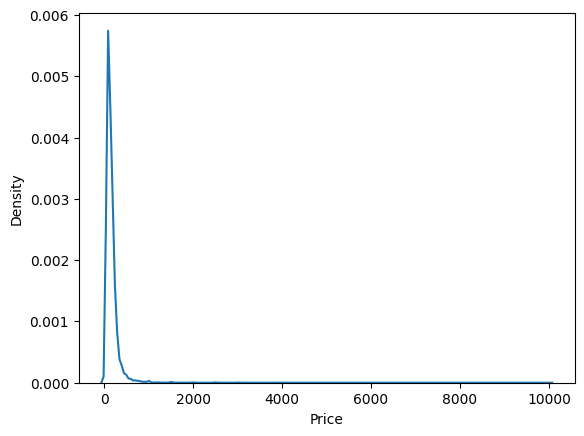

In [9]:
sns.kdeplot(df['Price'])

<Axes: xlabel='price_log', ylabel='Density'>

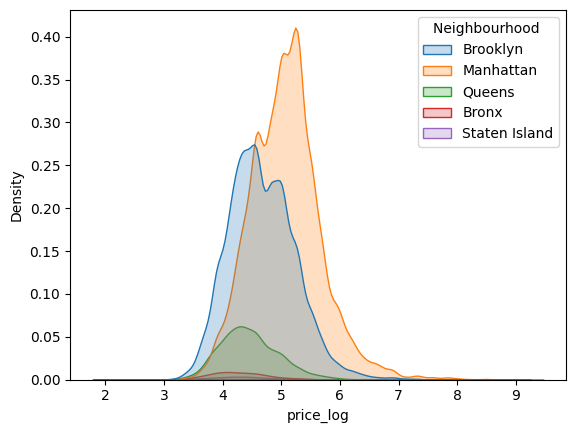

In [10]:
df['price_log'] = np.log(df['Price'])
sns.kdeplot(data = df, x = 'price_log', hue = 'Neighbourhood ', fill = True)

In [11]:
#Q2
ddf = pd.get_dummies(df[['Neighbourhood ', 'Property Type', 'Room Type']], dtype='int', drop_first=True)
ddf.head()

,Neighbourhood _Brooklyn,Neighbourhood _Manhattan,Neighbourhood _Queens,Neighbourhood _Staten Island,Property Type_Bed & Breakfast,Property Type_Boat,Property Type_Bungalow,Property Type_Cabin,Property Type_Camper/RV,Property Type_Castle,...,Property Type_Hut,Property Type_Lighthouse,Property Type_Loft,Property Type_Other,Property Type_Tent,Property Type_Townhouse,Property Type_Treehouse,Property Type_Villa,Room Type_Private room,Room Type_Shared room
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [12]:
#Q3
from sklearn import linear_model
from sklearn.model_selection import train_test_split

y = df['Price']
X = df.loc[:, ['Neighbourhood ', 'Room Type', 'Property Type']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [13]:
#Q4 *I had a hard time with this question so I used chatGPT to help me so it may be wrong
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[['Review Scores Rating']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

reg = linear_model.LinearRegression().fit(X_train, y_train)
y_hat = reg.predict(X_test)
print('R-squared: ', reg.score(X_test, y_test))
print('RMSE: ', np.sqrt(np.mean((y_test - y_hat)**2)))

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
print(results)

R-squared:  0.0014511780302844945
RMSE:  230.2218160825851
               variable  coefficient
0  Review Scores Rating     0.961658


In [16]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

y = df['Price']
X = df.loc[:, ['Review Scores Rating', 'Neighbourhood ', 'Property Type']]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=100)

dummy_neighbourhood_train = pd.get_dummies(X_train['Neighbourhood '], dtype='int')
dummy_neighbourhood_test = pd.get_dummies(X_test['Neighbourhood '], dtype='int')

dummy_property_train = pd.get_dummies(X_train['Property Type'], dtype='int')
dummy_property_test = pd.get_dummies(X_test['Property Type'], dtype='int')

dummy_neighbourhood_test = dummy_neighbourhood_test.reindex(columns=dummy_neighbourhood_train.columns, fill_value=0)
dummy_property_test = dummy_property_test.reindex(columns=dummy_property_train.columns, fill_value=0)

Z_train = pd.concat([X_train['Review Scores Rating'],
                     dummy_neighbourhood_train, dummy_property_train], axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'],
                     dummy_neighbourhood_test, dummy_property_test], axis = 1)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train)
y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

Rsq:  0.041450536323447085
RMSE:  225.563636670318


,variable,coefficient
0,Review Scores Rating,1.041740
1,Bronx,-63.239813
2,Brooklyn,-25.043194
3,Manhattan,48.120554
4,Queens,-55.910889
5,Staten Island,0.333700
6,Apartment,51.125373
7,Bed & Breakfast,22.734656
8,Boat,90.472265
9,Bungalow,103.548010


In [15]:
#Q5
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

X = df[['Review Scores Rating', 'Neighbourhood ', 'Property Type']]
y = df['Price']

X = pd.get_dummies(X, drop_first=True)

expander = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
Z = expander.fit_transform(X)
names = expander.get_feature_names_out()
zdf = pd.DataFrame(data=Z, columns=names)
zdf.head()

,Review Scores Rating,Neighbourhood _Brooklyn,Neighbourhood _Manhattan,Neighbourhood _Queens,Neighbourhood _Staten Island,Property Type_Bed & Breakfast,Property Type_Boat,Property Type_Bungalow,Property Type_Cabin,Property Type_Camper/RV,...,Property Type_Tent^2,Property Type_Tent Property Type_Townhouse,Property Type_Tent Property Type_Treehouse,Property Type_Tent Property Type_Villa,Property Type_Townhouse^2,Property Type_Townhouse Property Type_Treehouse,Property Type_Townhouse Property Type_Villa,Property Type_Treehouse^2,Property Type_Treehouse Property Type_Villa,Property Type_Villa^2
0,91.99323,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,91.99323,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,91.99323,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,91.99323,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,96.00000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.2, random_state=0)

complex_model = LinearRegression()
complex_model.fit(X_train, y_train)

y_train_pred = complex_model.predict(X_train)
y_test_pred = complex_model.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Training Set R-squared:", train_r2)
print("Training Set RMSE:", train_rmse)
print("Test Set R-squared:", test_r2)
print("Test Set RMSE:", test_rmse)

Training Set R-squared: 0.06564349140450165
Training Set RMSE: 194.50498737677523
Test Set R-squared: 0.030251730371306906
Test Set RMSE: 180.58701041222545


Q6: The complex models made predictions closer to the actual values, while simpler models had higher errors and missed patterns, leading to underfitting. But if models get too complex, they might overfit, capturing noise instead of general trends. Finding a balance is key to avoid both underfitting and overfitting.